http://thinkstats2.com
Copyright 2016 Allen B. Downey
MIT License: https://opensource.org/licenses/MIT

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load baseball teams core data
teams_df = pd.read_csv('/Users/Phil_Han/Documents/Teams.csv')
teams_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [3]:
# Removing unnecessary column variables
drop_cols = ['lgID', 'franchID','divID','Rank', 'Ghome', 'L'
            ,'DivWin','WCWin', 'LgWin', 'WSWin','SF','name','park'
            ,'BPF','PPF','teamIDBR','teamIDlahman45'
            ,'teamIDretro','franchID']

df = teams_df.drop(drop_cols, axis=1)

print(df.head())

   yearID teamID   G   W    R    AB    H  2B  3B  HR  ...  SV  IPouts   HA  \
0    1871    BS1  31  20  401  1372  426  70  37   3  ...   3     828  367   
1    1871    CH1  28  19  302  1196  323  52  21  10  ...   1     753  308   
2    1871    CL1  29  10  249  1186  328  35  40   7  ...   0     762  346   
3    1871    FW1  19   7  137   746  178  19   8   2  ...   0     507  261   
4    1871    NY2  33  16  302  1404  403  43  21   1  ...   0     879  373   

   HRA  BBA  SOA    E  DP     FP  attendance  
0    2   42   23  243  24  0.834         NaN  
1    6   28   22  229  16  0.829         NaN  
2   13   53   34  234  15  0.818         NaN  
3    5   21   17  163   8  0.803         NaN  
4    7   42   22  235  14  0.840         NaN  

[5 rows x 30 columns]


In [4]:
# Print out null values of all columns of 'df'
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 16, 126, 832, 1158, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 279]


In [5]:
# Eliminationg columns with null values
df = df.drop(['CS', 'HBP'], axis=1)

#Filling null values
df['SO'] = df['SO'].fillna(df['SO'].median())
df['DP'] = df['DP'].fillna(df['DP'].median())

#Print out null values of all columsn of 'df'
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 126, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 279]


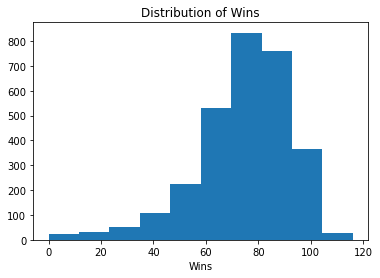

In [6]:
# matplotlib plots inline

%matplotlib inline

plt.hist(df['W'])
plt.xlabel("Wins")
plt.title('Distribution of Wins')

plt.show()

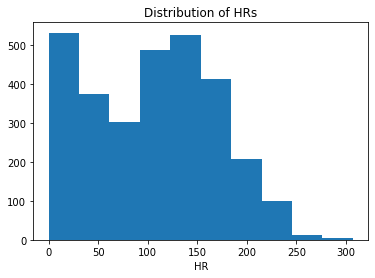

In [7]:
# matplotlib plots inline

%matplotlib inline

plt.hist(df['HR'])
plt.xlabel("HR")
plt.title('Distribution of HRs')

plt.show()

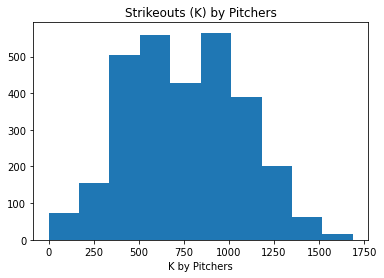

In [8]:
# matplotlib plots inline

%matplotlib inline

plt.hist(df['SOA'])
plt.xlabel("K by Pitchers")
plt.title('Strikeouts (K) by Pitchers')

plt.show()

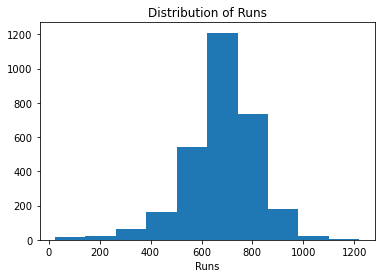

In [9]:
# matplotlib plots inline

%matplotlib inline

plt.hist(df['R'])
plt.xlabel("Runs")
plt.title('Distribution of Runs')

plt.show()

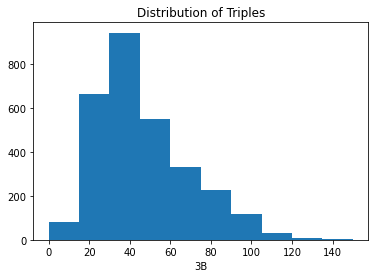

In [10]:
# matplotlib plots inline

%matplotlib inline

plt.hist(df['3B'])
plt.xlabel("3B")
plt.title('Distribution of Triples')

plt.show()

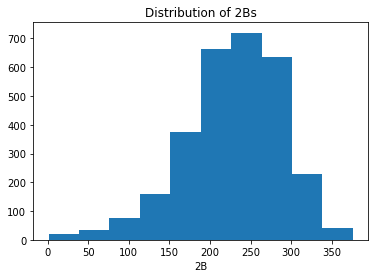

In [11]:
# matplotlib plots inline

%matplotlib inline

plt.hist(df['2B'])
plt.xlabel("2B")
plt.title('Distribution of 2Bs')

plt.show()

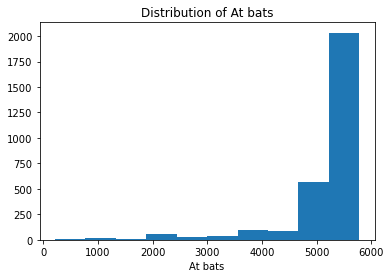

In [12]:
# matplotlib plots inline

%matplotlib inline

plt.hist(df['AB'])
plt.xlabel("At bats")
plt.title('Distribution of At bats')

plt.show()

In [13]:
# Mean of the variables

print(df['W'].mean(), df['HR'].mean(), df['2B'].mean(), df['3B'].mean(),df['SOA'].mean(),df['AB'].mean(), 
      df['R'].mean())



74.54653130287647 104.92927241962775 228.33028764805414 45.90964467005076 755.0500846023689 5126.259560067682 680.4964467005076


In [14]:
# Mode of the variables


print(df['W'].mode(), df['HR'].mode(), df['2B'].mode(), df['3B'].mode(),df['SOA'].mode(),df['AB'].mode(),
     df['R'].mode())

0    75
dtype: int64 0    20
dtype: int64 0    259
dtype: int64 0    35
dtype: int64 0    488
1    897
dtype: int64 0    5491
dtype: int64 0    682
dtype: int64


In [15]:
#Spread of the variables


print(df['W'].var(), df['HR'].var(), df['2B'].var(), df['3B'].var(),df['SOA'].var(),df['AB'].var(),
     df['R'].var())

324.65076233779746 4038.42661406084 3597.27882168434 504.9826930016619 99384.52491113041 642816.2342306796 19590.64343692976


In [16]:
# Standard deviation of the variables

print(df['W'].std(), df['HR'].var(), df['2B'].std(), df['3B'].std(),df['SOA'].std(),df['AB'].std(),
     df['R'].var())

18.01806766381449 4038.42661406084 59.97731922722405 22.471819975285978 315.2531124527249 801.7582143206763 19590.64343692976


In [17]:
# Tails of the variables

print(df['W'].tail(), df['HR'].tail, df['2B'].tail(), df['3B'].tail(), df['SOA'].tail(),df['AB'].tail(), df['R'].tail)

2950    30
2951    40
2952    22
2953    32
2954    26
Name: W, dtype: int64 <bound method NDFrame.tail of 0        3
1       10
2        7
3        2
4        1
        ..
2950    51
2951    80
2952    62
2953    88
2954    66
Name: HR, Length: 2955, dtype: int64> 2950     73
2951    105
2952     80
2953    104
2954    112
Name: 2B, dtype: int64 2950     7
2951    12
2952     9
2953     4
2954    12
Name: 3B, dtype: int64 2950    464
2951    552
2952    489
2953    519
2954    508
Name: SOA, dtype: int64 2950    1752
2951    1975
2952    1936
2953    2023
2954    1968
Name: AB, dtype: int64 <bound method NDFrame.tail of 0       401
1       302
2       249
3       137
4       302
       ... 
2950    240
2951    289
2952    224
2953    302
2954    293
Name: R, Length: 2955, dtype: int64>


In [18]:
# Creating bins for the win column

def assign_win_bins(W):
    if W < 50:
        return 1
    if W >= 50 and W <= 69:
        return 2
    if W >= 70 and W <= 89:
        return 3
    if W >= 90 and W <= 109:
        return 4
    if W >= 110:
        return 5
        
df['win_bins'] = df['W'].apply(assign_win_bins)

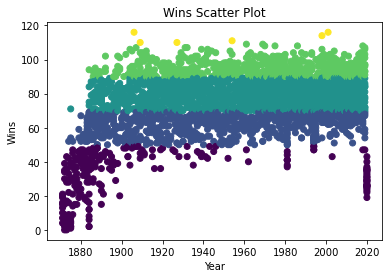

In [19]:
# Plotting scater graph of Year vs. Wins
plt.scatter(df['yearID'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Wins')

plt.show()

In [20]:
# Filter for rows where 'yearID' is greater than 1900
df = df[df['yearID'] > 1900]
    

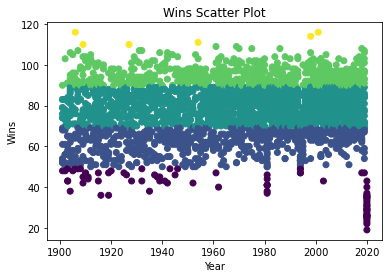

In [21]:
# Plotting scater graph of Year vs. Wins
plt.scatter(df['yearID'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Wins')

plt.show()

In [22]:
# Create runs per year and games per year dictionaries
# from Scikit-Learn Tutorial: Baseball Analytics in Python Pt 1 - DataCamp

runs_per_year = {}
games_per_year = {}

for i, row in df.iterrows():
    year = row['yearID']
    runs = row['R']
    games = row['G']
    if year in runs_per_year:
        runs_per_year[year] = runs_per_year[year] + runs
        games_per_year[year] = games_per_year[year] + games
    else:
        runs_per_year[year] = runs
        games_per_year[year] = games
        
print(runs_per_year)
print(games_per_year)

{1901: 11067, 1902: 9901, 1903: 9892, 1904: 9305, 1905: 9639, 1906: 8881, 1907: 8703, 1908: 8422, 1909: 8810, 1910: 9584, 1911: 11164, 1912: 11154, 1913: 9964, 1914: 14532, 1915: 14213, 1916: 8889, 1917: 8948, 1918: 7385, 1919: 8657, 1920: 10762, 1921: 11935, 1922: 12059, 1923: 11874, 1924: 11722, 1925: 12596, 1926: 11443, 1927: 11745, 1928: 11645, 1929: 12747, 1930: 13695, 1931: 11892, 1932: 12116, 1933: 10988, 1934: 12000, 1935: 12026, 1936: 12846, 1937: 12070, 1938: 11969, 1939: 11876, 1940: 11568, 1941: 11168, 1942: 9995, 1943: 9694, 1944: 10353, 1945: 10286, 1946: 9953, 1947: 10827, 1948: 11328, 1949: 11426, 1950: 12013, 1951: 11268, 1952: 10349, 1953: 11426, 1954: 10827, 1955: 11069, 1956: 11031, 1957: 10636, 1958: 10578, 1959: 10853, 1960: 10664, 1961: 12942, 1962: 14461, 1963: 12780, 1964: 13124, 1965: 12946, 1966: 12900, 1967: 12210, 1968: 11109, 1969: 15850, 1970: 16880, 1971: 15073, 1972: 13706, 1973: 16376, 1974: 16046, 1975: 16295, 1976: 15492, 1977: 18803, 1978: 17251, 19

In [23]:
# Create MLB runs per game (per year) dictionary
# from Scikit-Learn Tutorial: Baseball Analytics in Python Pt 1 - DataCamp

mlb_runs_per_game = {}
for k, v in games_per_year.items():
    year = k
    games = v
    runs = runs_per_year[year]
    mlb_runs_per_game[year] = runs / games
    
print(mlb_runs_per_game)

{1901: 4.989630297565374, 1902: 4.439910313901345, 1903: 4.439856373429085, 1904: 3.7279647435897436, 1905: 3.8961196443007275, 1906: 3.6189894050529747, 1907: 3.5291970802919708, 1908: 3.385048231511254, 1909: 3.54955680902498, 1910: 3.8366693354683745, 1911: 4.512530315278901, 1912: 4.526785714285714, 1913: 4.037277147487845, 1914: 3.8648936170212767, 1915: 3.8125, 1916: 3.5641539695268647, 1917: 3.587810745789896, 1918: 3.6343503937007875, 1919: 3.8716457960644006, 1920: 4.360615883306321, 1921: 4.855573637103336, 1922: 4.870355411954765, 1923: 4.815085158150851, 1924: 4.761169780666125, 1925: 5.128664495114006, 1926: 4.636547811993517, 1927: 4.75121359223301, 1928: 4.729894394800975, 1929: 5.185923515052888, 1930: 5.5490275526742305, 1931: 4.810679611650485, 1932: 4.913219789132198, 1933: 4.481239804241436, 1934: 4.905968928863451, 1935: 4.89657980456026, 1936: 5.188206785137318, 1937: 4.870863599677159, 1938: 4.89329517579722, 1939: 4.823720552396425, 1940: 4.679611650485437, 1941

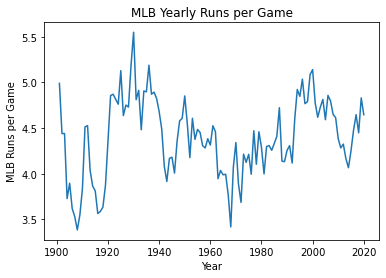

In [24]:
# Create lists from mlb_runs_per_game dictionary
# from Scikit-Learn Tutorial: Baseball Analytics in Python Pt 1 - DataCamp

lists = sorted(mlb_runs_per_game.items())
x, y = zip(*lists)

# Create line plot of Year vs. MLB runs per Game
plt.plot(x, y)
plt.title('MLB Yearly Runs per Game')
plt.xlabel('Year')
plt.ylabel('MLB Runs per Game')

plt.show()

/Users/Phil_Han/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


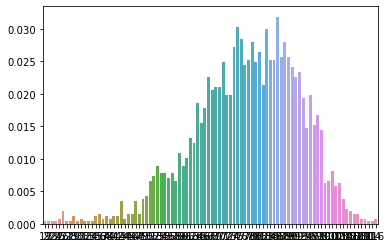

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns

pdf = df['W'].value_counts(normalize=True)
sns.barplot(pdf.index, pdf.values)
plt.show()

(array([0.0513, 0.1551, 0.2187, 0.2269, 0.1647, 0.0973, 0.05  , 0.0231,
        0.0086, 0.0043]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

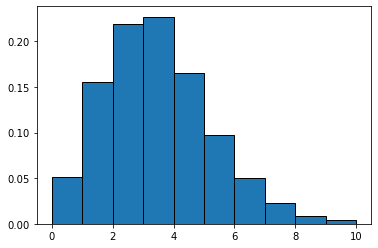

In [26]:
from scipy.stats import poisson
import matplotlib.pyplot as plt

x = poisson.rvs(mu=3, size=10000)

plt.hist(x, density=True, edgecolor='black')

In [27]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

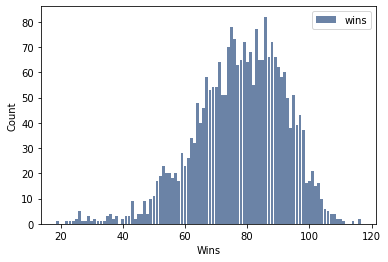

In [28]:
# Histogram on Wins

hist = thinkstats2.Hist(df['W'], label='wins')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Wins', ylabel='Count')

In [29]:
# To normalize the distribution, we could divide through by the total count:

n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n

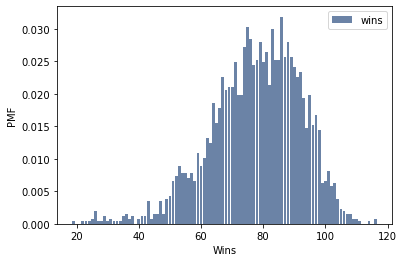

In [30]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Wins', ylabel='PMF')

In [31]:
# load baseball teams core data
teams_df = pd.read_csv('/Users/Phil_Han/Documents/Teams.csv')
teams_df.head()

# Removing unnecessary column variables
drop_cols = ['franchID','divID','Rank', 'Ghome', 'L'
            ,'DivWin','WCWin', 'LgWin', 'WSWin','SF','name','park'
            ,'BPF','PPF','teamIDBR','teamIDlahman45'
            ,'teamIDretro','franchID']

df = teams_df.drop(drop_cols, axis=1)

# Filter for rows where 'yearID' is greater than 1900
df = df[df['yearID'] > 1900]

print(df.head())

     yearID lgID teamID    G   W    R    AB     H   2B   3B  ...  SV  IPouts  \
383    1901   AL    BLA  134  68  760  4589  1348  179  111  ...   3    3474   
384    1901   AL    BOS  138  79  759  4866  1353  183  104  ...   1    3651   
385    1901   NL    BRO  137  79  744  4879  1399  206   93  ...   5    3641   
386    1901   NL    BSN  140  69  531  4746  1180  135   36  ...   0    3789   
387    1901   AL    CHA  137  83  819  4725  1303  173   89  ...   2    3655   

       HA  HRA  BBA  SOA    E   DP     FP  attendance  
383  1313   21  344  271  401   76  0.926    141952.0  
384  1178   33  294  396  337  104  0.943    289448.0  
385  1244   18  435  583  281   99  0.950    198200.0  
386  1196   29  349  558  282   89  0.952    146502.0  
387  1250   27  312  394  345  100  0.941    354350.0  

[5 rows x 31 columns]


In [32]:
# Filter for rows with League ID equal to NL (National League)

NL_df = df[df['lgID']=='NL']

In [33]:
print(NL_df.head())

     yearID lgID teamID    G   W    R    AB     H   2B  3B  ...  SV  IPouts  \
385    1901   NL    BRO  137  79  744  4879  1399  206  93  ...   5    3641   
386    1901   NL    BSN  140  69  531  4746  1180  135  36  ...   0    3789   
388    1901   NL    CHN  140  53  578  4844  1250  153  61  ...   0    3725   
389    1901   NL    CIN  142  52  561  4914  1232  173  70  ...   0    3797   
393    1901   NL    NY1  141  52  544  4839  1225  167  46  ...   1    3696   

       HA  HRA  BBA  SOA    E   DP     FP  attendance  
385  1244   18  435  583  281   99  0.950    198200.0  
386  1196   29  349  558  282   89  0.952    146502.0  
388  1348   27  324  586  336   87  0.943    205071.0  
389  1469   51  365  542  355  102  0.940    205728.0  
393  1389   24  377  542  348   81  0.941    297650.0  

[5 rows x 31 columns]


In [34]:
# Filter for rows with League ID equal to AL (American League)

AL_df = df[df['lgID']=='AL']

In [35]:
print(AL_df.head())

     yearID lgID teamID    G   W    R    AB     H   2B   3B  ...  SV  IPouts  \
383    1901   AL    BLA  134  68  760  4589  1348  179  111  ...   3    3474   
384    1901   AL    BOS  138  79  759  4866  1353  183  104  ...   1    3651   
387    1901   AL    CHA  137  83  819  4725  1303  173   89  ...   2    3655   
390    1901   AL    CLE  138  54  666  4833  1311  197   68  ...   4    3547   
391    1901   AL    DET  135  74  741  4676  1303  180   80  ...   2    3566   

       HA  HRA  BBA  SOA    E   DP     FP  attendance  
383  1313   21  344  271  401   76  0.926    141952.0  
384  1178   33  294  396  337  104  0.943    289448.0  
387  1250   27  312  394  345  100  0.941    354350.0  
390  1365   22  464  334  329   99  0.942    131380.0  
391  1328   22  313  307  410  127  0.930    259430.0  

[5 rows x 31 columns]


In [36]:
# To normalize the distribution, we could divide through by the total count:

n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n

In [37]:
NL_pmf = thinkstats2.Pmf(NL_df['W'], label='NL Wins')
AL_pmf = thinkstats2.Pmf(AL_df['W'], label='AL Wins')

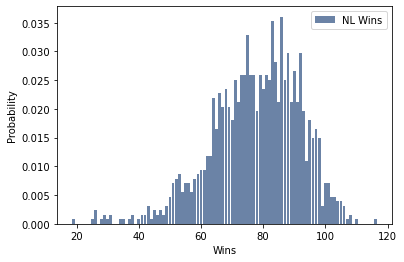

In [38]:
# Histograms for NL Wins

hist1 = thinkstats2.Hist(NL_pmf, label='NL Wins')
thinkplot.Hist(hist1)
thinkplot.Config(xlabel='Wins', ylabel='Probability')

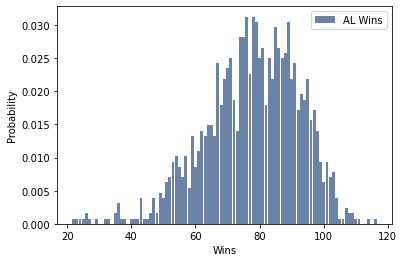

In [39]:
# Histograms for AL Wins

hist2 = thinkstats2.Hist(AL_pmf, label='AL Wins')
thinkplot.Hist(hist2)
thinkplot.Config(xlabel='Wins', ylabel='Probability')

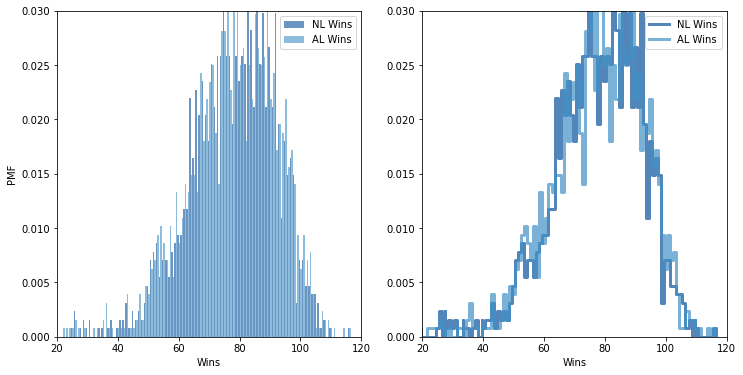

In [40]:
# PMF of wins for National League and American League, using bar graphs and step functions 

width=0.5
axis = [20, 120, 0, 0.03]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(NL_pmf, align='right', width=width)
thinkplot.Hist(AL_pmf, align='left', width=width)
thinkplot.Config(xlabel='Wins', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([NL_pmf, AL_pmf])
thinkplot.Config(xlabel='Wins', axis=axis)

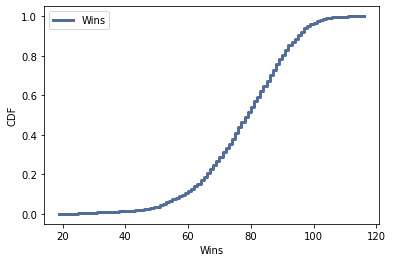

In [41]:
# CDF of Wins

cdf = thinkstats2.Cdf(df['W'], label='Wins')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Wins', ylabel='CDF', loc='upper left')

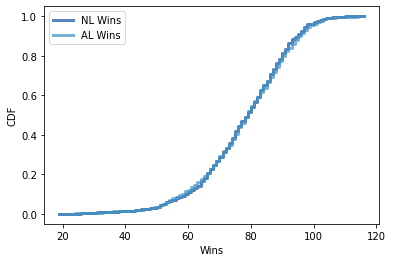

In [42]:
# CDF of National League Wins and American League Wins

NL_cdf = thinkstats2.Cdf(NL_df['W'], label='NL Wins')
AL_cdf = thinkstats2.Cdf(AL_df['W'], label='AL Wins')

thinkplot.PrePlot(2)
thinkplot.Cdfs([NL_cdf, AL_cdf])
thinkplot.Config(xlabel='Wins', ylabel='CDF')

Mean, Var 77.89532117367169 179.61870134411157
Sigma 13.402190169674192


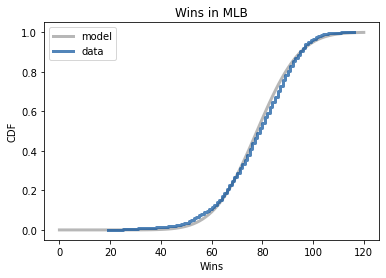

In [43]:
## Nornmal Probability Plot (Analytical Distribution) for Wins in MLB.

# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(df['W'], p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=120)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(df['W'], label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Wins in MLB',
                 xlabel='Wins',
                 ylabel='CDF')

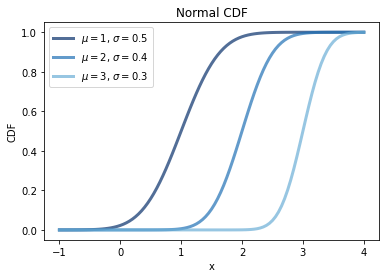

In [45]:
thinkplot.PrePlot(3)

mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    xs, ps = thinkstats2.RenderNormalCdf(mu=mu, sigma=sigma, 
                                               low=-1.0, high=4.0)
    label = r'$\mu=%g$, $\sigma=%g$' % (mu, sigma)
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title='Normal CDF', xlabel='x', ylabel='CDF',
                 loc='upper left')

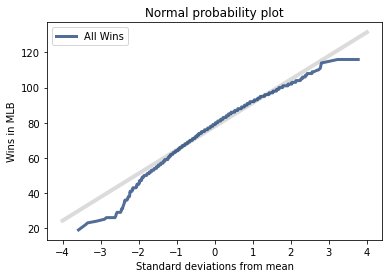

In [46]:
## Normal Probability Plot for the Wins in MLB, showing that a handful of teams played so poorly 
#  to tank their season for better draft picks.  Yet most of the teams played to win pennant (league championship). 

mean, var = thinkstats2.TrimmedMeanVar(df['W'], p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(df['W'])
thinkplot.Plot(xs, ys, label='All Wins')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Wins in MLB')

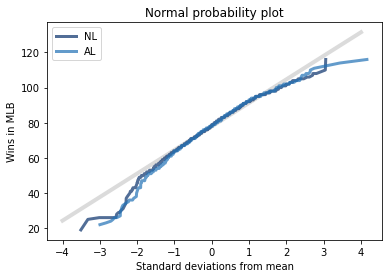

In [47]:
import thinkplot

mean, var = thinkstats2.TrimmedMeanVar(df['W'], p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

thinkplot.PrePlot(3) 
xs, ys = thinkstats2.NormalProbability(NL_df['W'])
thinkplot.Plot(xs, ys, label='NL')

xs, ys = thinkstats2.NormalProbability(AL_df['W'])
thinkplot.Plot(xs, ys, label='AL')
thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Wins in MLB')

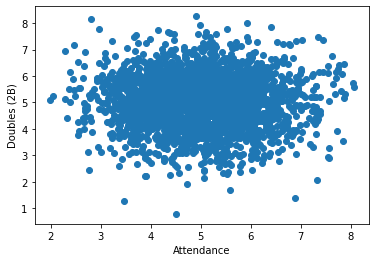

In [94]:
## Scatter Plot of 2B (Doubles) vs. Attendance

import numpy
import matplotlib.pyplot as plt

df['2B'] = numpy.random.normal(5.0, 1.0, 2572)
df['attendance'] = numpy.random.normal(5.0, 1.0, 2572)

plt.scatter(df['2B'], df['attendance'])
plt.xlabel('Attendance')
plt.ylabel('Doubles (2B)')
plt.show()

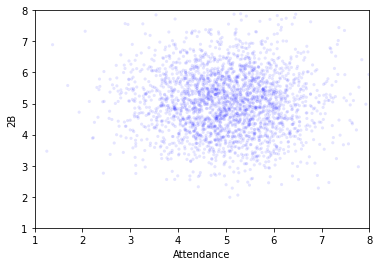

In [95]:
thinkplot.Scatter(df['attendance'], df['2B'], alpha=0.1, s=10)
thinkplot.Config(xlabel='Attendance',
                 ylabel='2B',
                 axis=[1, 8,1, 8],
                 legend=False)

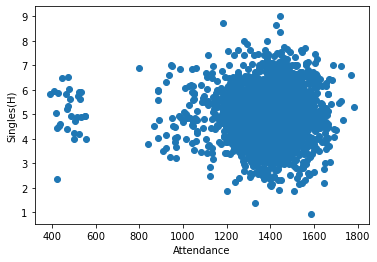

In [180]:
## Scatter Plot of Win vs. Attendance

import numpy
import matplotlib.pyplot as plt

df['W'] = numpy.random.normal(5.0, 1.0, 2572)
df['attendance'] = numpy.random.normal(5.0, 1.0, 2572)

plt.scatter(df['H'], df['attendance'])
plt.xlabel('Attendance')
plt.ylabel('Singles(H)')
plt.show()

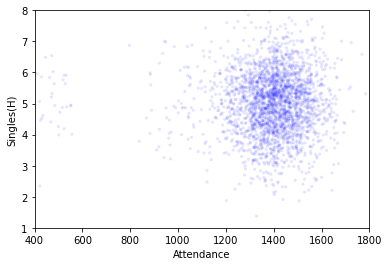

In [181]:
thinkplot.Scatter(df['H'], df['attendance'], alpha=0.1, s=10)
thinkplot.Config(xlabel='Attendance',
                 ylabel='Singles(H)',
                 axis=[400, 1800,1, 8],
                 legend=False)

In [192]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [193]:
## Covariance of the two variables (2B and Attendance)

Cov(df['2B'], df['attendance'])

-0.03978734281592078

In [194]:
## Covariance of the two variables (Single and Attendance)

Cov(df['H'], df['attendance'])

-0.9960837417315215

In [195]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [196]:
## Pearson's Correlation of the two variables (2B and Attendance)

Corr(df['2B'], df['attendance'])

-0.03930973452355043

In [197]:
## Pearson's Correlation of the two variables (2B and Attendance)

Corr(df['H'], df['attendance'])

-0.006210273516426592

In [200]:
import pandas as pd

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [201]:
## Spearman Correlation of the two variables (2B and Attendance)

SpearmanCorr(df['2B'], df['attendance'])

-0.03136382942522011

In [202]:
## Spearman Correlation of the two variables (2B and Attendance)

SpearmanCorr(df['H'], df['attendance'])

0.007166217294237628

In [190]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [191]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [106]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [107]:
### To compute the p-value of an observed difference in means

#cleaned = df.dropna(subset=[df['2B'],df['attendance']])
data = df['2B'].values, df['attendance'].values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.011

In [108]:
## A permutation test with a different test statistic.

ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.066

In [109]:
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

In [110]:
inter, slope = LeastSquares(df['2B'], df['attendance'])
inter, slope

(5.152371834971223, -0.02808052839228974)

In [111]:
inter + slope * 25

4.45035862516398

In [112]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [113]:
fit_xs, fit_ys = FitLine(df['attendance'], inter, slope)

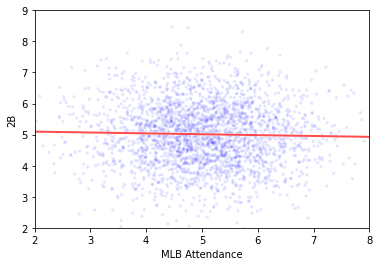

In [114]:
thinkplot.Scatter(df['attendance'], df['2B'], color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="MLB Attendance",
                 ylabel='2B',
                 axis=[2, 8, 2, 9],
                 legend=False)

In [206]:
# load baseball teams core data
teams_df = pd.read_csv('/Users/Phil_Han/Documents/Teams.csv')
teams_df.head()

# Removing unnecessary column variables
drop_cols = ['franchID','divID','Rank', 'Ghome', 'L'
            ,'DivWin','WCWin', 'LgWin', 'WSWin','SF','name','park'
            ,'BPF','PPF','teamIDBR','teamIDlahman45'
            ,'teamIDretro','franchID']

df = teams_df.drop(drop_cols, axis=1)

# Filter for rows where 'yearID' is greater than 1900
df = df[df['yearID'] > 1900]
df[(df.sum(axis=1) !=0)]

print(df.head())

     yearID lgID teamID    G   W    R    AB     H   2B   3B  ...  SV  IPouts  \
383    1901   AL    BLA  134  68  760  4589  1348  179  111  ...   3    3474   
384    1901   AL    BOS  138  79  759  4866  1353  183  104  ...   1    3651   
385    1901   NL    BRO  137  79  744  4879  1399  206   93  ...   5    3641   
386    1901   NL    BSN  140  69  531  4746  1180  135   36  ...   0    3789   
387    1901   AL    CHA  137  83  819  4725  1303  173   89  ...   2    3655   

       HA  HRA  BBA  SOA    E   DP     FP  attendance  
383  1313   21  344  271  401   76  0.926    141952.0  
384  1178   33  294  396  337  104  0.943    289448.0  
385  1244   18  435  583  281   99  0.950    198200.0  
386  1196   29  349  558  282   89  0.952    146502.0  
387  1250   27  312  394  345  100  0.941    354350.0  

[5 rows x 31 columns]


In [207]:
# Eliminationg columns with null values
df = df.drop(['CS', 'HBP'], axis=1)

#Filling null values
df['SO'] = df['SO'].fillna(df['SO'].median())
df['DP'] = df['DP'].fillna(df['DP'].median())

#Print out null values of all columns of 'df'
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16]


In [209]:
df.head()

,yearID,lgID,teamID,G,W,R,AB,H,2B,3B,...,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance
383,1901,AL,BLA,134,68,760,4589,1348,179,111,...,3,3474,1313,21,344,271,401,76,0.926,141952.0
384,1901,AL,BOS,138,79,759,4866,1353,183,104,...,1,3651,1178,33,294,396,337,104,0.943,289448.0
385,1901,NL,BRO,137,79,744,4879,1399,206,93,...,5,3641,1244,18,435,583,281,99,0.950,198200.0
386,1901,NL,BSN,140,69,531,4746,1180,135,36,...,0,3789,1196,29,349,558,282,89,0.952,146502.0
387,1901,AL,CHA,137,83,819,4725,1303,173,89,...,2,3655,1250,27,312,394,345,100,0.941,354350.0


In [210]:
## Regression analysis on Attendance as a function of Strikeout by Pichers

import statsmodels.formula.api as smf

formula = 'attendance ~ SOA'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             attendance   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     3417.
Date:                Sat, 20 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:13:18   Log-Likelihood:                -37732.
No. Observations:                2556   AIC:                         7.547e+04
Df Residuals:                    2554   BIC:                         7.548e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.927e+05   3.84e+04    -18.059      0.000   -7.68e+05   -6.17e+05
SOA         2586.6672     44.250     58.456      0.000    2499.898    2673.436
==============================================================================
Omnibus:                      148.693   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.500
Skew:                           0.541   Prob(JB):                     3.53e-43
Kurtosis:                       3.817   Cond. No.                     2.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [211]:
## Regression analysis on Attendance as a function of Strikeout

import statsmodels.formula.api as smf

formula = 'attendance ~ HR'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             attendance   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     2627.
Date:                Sat, 20 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:13:35   Log-Likelihood:                -37913.
No. Observations:                2556   AIC:                         7.583e+04
Df Residuals:                    2554   BIC:                         7.584e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.996e+04   2.97e+04      2.358      0.018    1.18e+04    1.28e+05
HR          1.158e+04    225.848     51.254      0.000    1.11e+04     1.2e+04
==============================================================================
Omnibus:                      143.403   Durbin-Watson:                   1.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.157
Skew:                           0.573   Prob(JB):                     4.14e-38
Kurtosis:                       3.552   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
## Regression analysis on Attendance as a function of Homeruns

formula = 'attendance ~ HR'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             attendance   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     2627.
Date:                Sat, 20 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:09:56   Log-Likelihood:                -37913.
No. Observations:                2556   AIC:                         7.583e+04
Df Residuals:                    2554   BIC:                         7.584e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.996e+04   2.97e+04      2.358      0.018    1.18e+04    1.28e+05
HR          1.158e+04    225.848     51.254      0.000    1.11e+04     1.2e+04
==============================================================================
Omnibus:                      143.403   Durbin-Watson:                   1.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.157
Skew:                           0.573   Prob(JB):                     4.14e-38
Kurtosis:                       3.552   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## References

# 1. Downey, Allen (2014).  Think Stats Exploratory Data Analysis .  O'Reilly

# 2. Lahman, Sean (N.D.).  Seanlahman.com.  http://www.seanlahman.com/baseball-archive/statistics/

# 3. Poston, Daniel (2014, May 4).  Scikit-Learn Tutorial: Baseball Analytics Pt 1.  
#    https://www.datacamp.com/community/tutorials/scikit-learn-tutorial-baseball-1